In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# one,all,kmp,any,any2
reacing_max = {
    'Katz':        (0.423076923076923, 0.013076923076923, 0.516923076923077, 0.525384615384615, 0.414615384615385),
    'lKatz':       (0.538461538461538, 0.566923076923077, 0.569230769230769, 0.629230769230769, 0.621538461538461),
    'For':         (0.259230769230769, 0.372307692307692, 0.414615384615385, 0.613076923076923, 0.567692307692308),
    'logFor':      (0.511538461538461, 0.580769230769231, 0.553846153846154, 0.610000000000000, 0.613076923076923),
    'Comm':        (0.536923076923077, 0.538461538461538, 0.549230769230769, 0.551538461538462, 0.544615384615385),
    'logComm':     (0.576923076923077, 0.594615384615385, 0.598461538461538, 0.615384615384615, 0.613076923076923),
    'Heat':        (0.485384615384615, 0.733846153846154, 0.440769230769231, 0.636923076923077, 0.665384615384615),
    'logHeat':     (0.580769230769231, 0.656153846153846, 0.586923076923077, 0.651538461538462, 0.654615384615385),
    'NHeat':       (0.504615384615385, 0.508461538461539, 0.521538461538462, 0.516923076923077, 0.520000000000000),
    'logNHeat':    (0.583846153846154, 0.596153846153846, 0.593076923076923, 0.622307692307692, 0.608461538461538),
    'SCT':         (0.526923076923077, 0.563846153846154, 0.531538461538462, 0.568461538461538, 0.570000000000000),
    'SCCT':        (0.610000000000000, 0.636923076923077, 0.634615384615385, 0.654615384615385, 0.653846153846154),
    'RSP':         (0.552307692307692, 0.556153846153846, 0.564615384615385, 0.580769230769231, 0.576923076923077),
    'FE':          (0.567692307692308, 0.557692307692308, 0.577692307692308, 0.605384615384615, 0.598461538461538),
    'PPR':         (0.424615384615385, 0.026923076923077, 0.476923076923077, 0.553076923076923, 0.430000000000000),
    'logPPR':      (0.563846153846154, 0.540000000000000, 0.567692307692308, 0.620000000000000, 0.590769230769231),
    'ModifPPR':    (0.273076923076923, 0.402307692307692, 0.328461538461538, 0.508461538461539, 0.479230769230769),
    'logModifPPR': (0.560000000000000, 0.559230769230769, 0.557692307692308, 0.630000000000000, 0.604615384615385),
    'HeatPR':      (0.520000000000000, 0.510000000000000, 0.521538461538462, 0.529230769230769, 0.529230769230769),
    'logHeatPR':   (0.582307692307692, 0.593846153846154, 0.590769230769231, 0.627692307692308, 0.618461538461539),
    'DF':          (0.500000000000000, 0.369230769230769, 0.544615384615385, 0.478461538461538, 0.465384615384615),
    'logDF':       (0.544615384615385, 0.583846153846154, 0.549230769230769, 0.576923076923077, 0.580769230769231),
    'Abs':         (0.383076923076923, 0.043076923076923, 0.616923076923077, 0.629230769230769, 0.503076923076923),
    'logAbs':      (0.564615384615385, 0.535384615384615, 0.558461538461538, 0.597692307692308, 0.570000000000000),
    'SP-CT':       (0.553076923076923, 0.553076923076923, 0.556153846153846, 0.660000000000000, 0.620000000000000)
}


# one,all,kmp,any,any2
avg_ari = {
    'Katz':        (0.529264849388707, 0.107252153138868, 0.541059839957164, 0.557768676510659, 0.537764685363390),
    'lKatz':       (0.820284047179819, 0.822944721957384, 0.825913665637781, 0.836167444460054, 0.833668540386380),
    'For':         (0.353851303695342, 0.353038102675712, 0.440512382530680, 0.504088220174153, 0.493089034355574),
    'logFor':      (0.815149460065459, 0.826095257011675, 0.820878862605812, 0.831638989340399, 0.831569679150878),
    'Comm':        (0.793698682282278, 0.794146892856084, 0.798338405483036, 0.799871617615671, 0.799421019945908),
    'logComm':     (0.862045869086366, 0.864097875672192, 0.864373040663222, 0.865576973527606, 0.865389873019250),
    'Heat':        (0.791210597386058, 0.826750932516736, 0.755491878507414, 0.821359100622989, 0.822938871493022),
    'logHeat':     (0.833459155105644, 0.849985008364297, 0.835372947818955, 0.851196569237489, 0.850942560682449),
    'NHeat':       (0.816507745348856, 0.815351749645231, 0.818437532994085, 0.818303371736478, 0.817282938891666),
    'logNHeat':    (0.853369341156442, 0.854444778855177, 0.853889566006495, 0.859635487558276, 0.857891081874019),
    'SCT':         (0.856837536227384, 0.865163448737527, 0.860595847330665, 0.866838173805521, 0.867325179859835),
    'SCCT':        (0.860928395008785, 0.865579206725732, 0.862701558749837, 0.866625759373977, 0.867031365761584),
    'RSP':         (0.848853276680954, 0.846629798721360, 0.852630042706917, 0.857299522398711, 0.854983869827641),
    'FE':          (0.830652716736717, 0.826182187404854, 0.831437856184490, 0.841255912744796, 0.837051699919628),
    'PPR':         (0.550866712549753, 0.080696334758661, 0.560735537155798, 0.578891166879312, 0.561472877630387),
    'logPPR':      (0.828489814973021, 0.823202656861144, 0.832131242012728, 0.840511970830950, 0.836958183096516),
    'ModifPPR':    (0.350545850029790, 0.348262883340659, 0.386286802991286, 0.479480793205436, 0.453536827205412),
    'logModifPPR': (0.828489814973021, 0.828709639168490, 0.829292282995348, 0.841571259335867, 0.838403482036298),
    'HeatPR':      (0.846977602696274, 0.847423856440599, 0.847573576916790, 0.848452503362371, 0.847634178634186),
    'logHeatPR':   (0.853157648287685, 0.854393628429622, 0.853243178742446, 0.858818900500778, 0.856378537805507),
    'DF':          (0.677753534392191, 0.597944388120009, 0.681641362768535, 0.681406896159878, 0.671638849191473),
    'logDF':       (0.839738097926016, 0.846170859358986, 0.838782383260047, 0.844485528076651, 0.845130435857531),
    'Abs':         (0.357492646945199, 0.098197210286860, 0.414837636788719, 0.442475992501005, 0.402766556475935),
    'logAbs':      (0.824829252224256, 0.818814559383943, 0.825256441843298, 0.832734719084018, 0.829248054239833),
    'SP-CT':       (0.800121798215795, 0.799590037956991, 0.801839947856774, 0.813775270362050, 0.811209771933980)
}

order = [
    'Katz', 'lKatz', 'Comm', 'logComm', 'DF', 'logDF',
    'For', 'logFor', 'Heat', 'logHeat', 'NHeat', 'logNHeat', 'Abs', 'logAbs',
    'PPR', 'logPPR', 'ModifPPR', 'logModifPPR', 'HeatPR', 'logHeatPR', 'RSP', 'FE',
    'SCT', 'SCCT', 'SP-CT'     
]

reacing_max = dict([(k, reacing_max[k]) for k in order])
avg_ari = dict([(k, avg_ari[k]) for k in order])

names = {
    'one': 'One',
    'all': 'All',
    'kmp': 'K-Means++',
    'comb1': 'One+All+Kmp',
    'comb2': 'One+All'
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


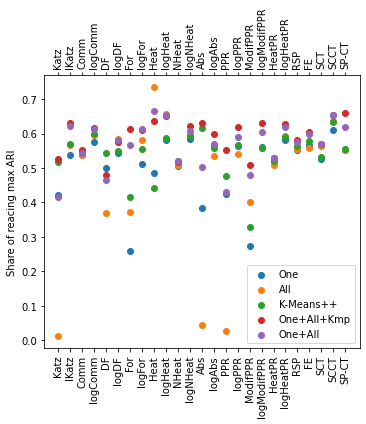

In [21]:
plt.subplots(1, figsize=(5, 6))
arr = reacing_max
for idx, title in enumerate(['one', 'all', 'kmp', 'comb1', 'comb2']):
    plt.scatter(range(len(arr)), [x[idx] for x in arr.values()], label=names[title])
plt.xticks(range(len(arr)), labels=arr.keys(), rotation='vertical')
plt.legend(loc='lower right')
plt.tick_params(right=False, top=True, labelright=False, labeltop=True)
plt.tight_layout()
plt.ylabel('Share of reacing max ARI');
plt.savefig('./figures/inits/reaching_max_ari.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


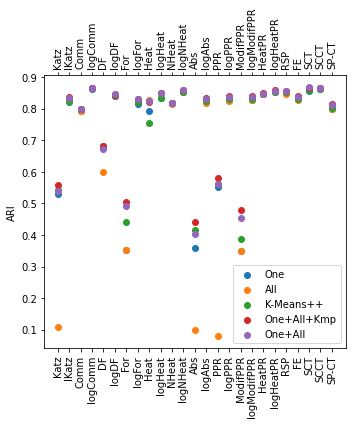

In [4]:
plt.subplots(1, figsize=(5, 6))
arr = avg_ari
for idx, title in enumerate(['one', 'all', 'kmp', 'comb1', 'comb2']):
    plt.scatter(range(len(arr)), [x[idx] for x in arr.values()], label=names[title])
plt.xticks(range(len(arr)), labels=arr.keys(), rotation='vertical')
plt.legend(loc='lower right')
plt.tick_params(right=False, top=True, labelright=False, labeltop=True)
plt.ylabel('ARI')
plt.tight_layout()
plt.savefig('./figures/inits/avg_ari.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


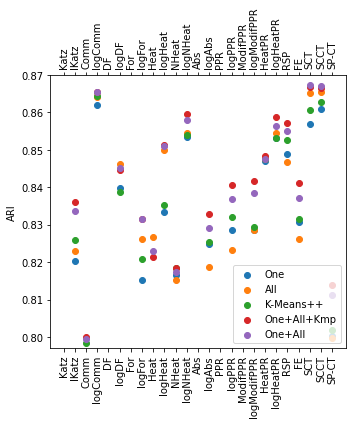

In [20]:
plt.subplots(1, figsize=(5, 6))
arr = avg_ari
for idx, title in enumerate(['one', 'all', 'kmp', 'comb1', 'comb2']):
    plt.scatter(range(len(arr)), [x[idx] for x in arr.values()], label=names[title])
plt.xticks(range(len(arr)), labels=arr.keys(), rotation='vertical')
plt.legend(loc='lower right')
plt.ylim(0.797, 0.87)
plt.tick_params(right=False, top=True, labelright=False, labeltop=True)
plt.ylabel('ARI')
plt.tight_layout()
plt.savefig('./figures/inits/avg_ari_2.eps')